<a href="https://colab.research.google.com/github/richardyun03/polo_tracking/blob/main/polo_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to Train YOLOv9 on a Custom Dataset
---

[![Roboflow](https://raw.githubusercontent.com/roboflow-ai/notebooks/main/assets/badges/roboflow-blogpost.svg)](https://blog.roboflow.com/train-yolov9-model/)
[![GitHub](https://badges.aleen42.com/src/github.svg)](https://github.com/WongKinYiu/yolov9)
[![YouTube](https://badges.aleen42.com/src/youtube.svg)](https://youtu.be/XHT2c8jT3Bc)
[![arXiv](https://img.shields.io/badge/arXiv-2402.13616-b31b1b.svg)](https://arxiv.org/pdf/2402.13616.pdf)

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Tue Jun 25 22:51:22 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

**NOTE:** To make it easier for us to manage datasets, images and models we create a `HOME` constant.

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Clone and Install

**NOTE:** YOLOv9 is very new. At the moment, we recommend using a fork of the main repository. The `detect.py` script contains a bug that prevents inference. This bug is patched in the fork.

In [3]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 24.35 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 5.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 53.2 MB/s eta 0:00:00


**NOTE:** Let's install the [`roboflow`](https://pypi.org/project/roboflow) package, which we will use to download our dataset from [Roboflow Universe](https://universe.roboflow.com/).

## Download model weights

**NOTE:** In the YOLOv9 paper, versions `yolov9-s` and `yolov9-m` are also mentioned, but the weights for these models are not yet available in the YOLOv9 [repository](https://github.com/WongKinYiu/yolov9).

In [4]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [5]:
!ls -la {HOME}/weights

total 402444
drwxr-xr-x 2 root root      4096 Jun 25 22:54 .
drwxr-xr-x 1 root root      4096 Jun 25 22:54 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


## Download example data

**NOTE:** If you want to run inference using your own file as input, simply upload image to Google Colab and update `SOURCE_IMAGE_PATH` with the path leading to your file.

In [ ]:
# !wget -P {HOME}/data -q https://media.roboflow.com/notebooks/examples/dog.jpeg

In [ ]:
# SOURCE_IMAGE_PATH = f"{HOME}/dog.jpeg"

In [47]:

!pip install roboflow


## V2
# from roboflow import Roboflow
# rf = Roboflow(api_key="5rLe80hJ5e7y3FnWjDW3")
# project = rf.workspace("polo-jveue").project("polo_d")
# version = project.version(2)
# dataset = version.download("yolov9")


## V3
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="5rLe80hJ5e7y3FnWjDW3")
# project = rf.workspace("polo-jveue").project("polo_d")
# version = project.version(3)
# dataset = version.download("yolov9")

## V4
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="5rLe80hJ5e7y3FnWjDW3")
project = rf.workspace("polo-jveue").project("polo_d")
version = project.version(4)
dataset = version.download("yolov9")



loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to polo_d-4 in yolov9:: 100%|██████████| 226/226 [00:00<00:00, 7001.30it/s]


## Detection with pre-trained COCO model

### gelan-c

In [ ]:
!python detect.py --weights {HOME}/weights/gelan-c.pt --conf 0.1 --source '/content/yolov9/Clothes-classification-3/train/images/IMG_3379_jpg.rf.4a75603f1796663fea981dbf8f2ca5a7.jpg' --device 0

detect: weights=['{HOME}/weights/gelan-c.pt'], source=/content/yolov9/Clothes-classification-3/train/images/IMG_3379_jpg.rf.4a75603f1796663fea981dbf8f2ca5a7.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.2.1+cu121 CUDA:0 (Tesla T4, 15102MiB)

Traceback (most recent call last):
  File "/content/yolov9/detect.py", line 232, in <module>
    main(opt)
  File "/content/yolov9/detect.py", line 227, in main
    run(**vars(opt))
  File "/usr/local/lib/python3.10/dist-packages/torch/utils/_contextlib.py", line 115, in decorate_context
    return func(*args, **kwargs)
  File "/content/yolov9/detect.py", line 6

**NOTE:** By default, the results of each subsequent inference sessions are saved in `{HOME}/yolov9/runs/detect/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [ ]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/detect/exp/IMG_3379_jpg.rf.4a75603f1796663fea981dbf8f2ca5a7.jpg", width=600)

## yolov9-e

In [ ]:
!python detect.py --weights {HOME}/weights/yolov9-e.pt --conf 0.1 --source '/content/yolov9/runs/detect/exp/IMG_3379_jpg.rf.4a75603f1796663fea981dbf8f2ca5a7.jpg' --device 0

python3: can't open file '/content/detect.py': [Errno 2] No such file or directory


## Authenticate and Download the Dataset

**NOTE:** The dataset must be saved inside the `{HOME}/yolov9` directory, otherwise, the training will not succeed.

In [7]:
import os
HOME = os.path.dirname(os.getcwd())
print(HOME)

/content


## Train Custom Model

In [37]:
%cd {HOME}/yolov9

!python train.py \
--batch 22 --epochs 30 --img 640 --device 0 --min-items 0 --close-mosaic 15 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-06-25 23:14:39.375790: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-06-25 23:14:39.375839: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-06-25 23:14:39.377182: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-25 23:14:40.710066: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
train: weights=/content/weights/gelan-c.pt, cfg=models/detect/gelan-c.yaml, data=/content/yolov9/polo_d-3/data.yaml, hyp=hyp.scratch-high.yaml, epochs=30, batch_size=22, imgsz=640, rect=False, resume=False, nosave=False, nova

In [38]:
# Testing an image from the training set after training
!python detect.py --weights /content/yolov9/runs/train/exp5/weights/best.pt --conf 0.1 --source '/content/yolov9/polo_d-2/test/images/youtube-105_jpg.rf.a594bbf6d6bb22b95f4b35cd42021a39.jpg' --device 0

detect: weights=['/content/yolov9/runs/train/exp5/weights/best.pt'], source=/content/yolov9/polo_d-2/test/images/youtube-105_jpg.rf.a594bbf6d6bb22b95f4b35cd42021a39.jpg, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
image 1/1 /content/yolov9/polo_d-2/test/images/youtube-105_jpg.rf.a594bbf6d6bb22b95f4b35cd42021a39.jpg: 640x640 1 ball, 1 cage, 8 whites, 51.7ms
Speed: 0.6ms pre-process, 51.7ms inference, 614.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to runs/det

## Examine Training Results

**NOTE:** By default, the results of each subsequent training sessions are saved in `{HOME}/yolov9/runs/train/`, in directories named `exp`, `exp2`, `exp3`, ... You can override this behavior by using the `--name` parameter.

In [39]:
!ls {HOME}/yolov9/runs/train/exp5/

confusion_matrix.png				    opt.yaml	  train_batch0.jpg
events.out.tfevents.1719357282.a830b3dce669.8084.0  P_curve.png   train_batch1.jpg
F1_curve.png					    PR_curve.png  train_batch2.jpg
hyp.yaml					    R_curve.png   val_batch0_labels.jpg
labels_correlogram.jpg				    results.csv   val_batch0_pred.jpg
labels.jpg					    results.png   weights


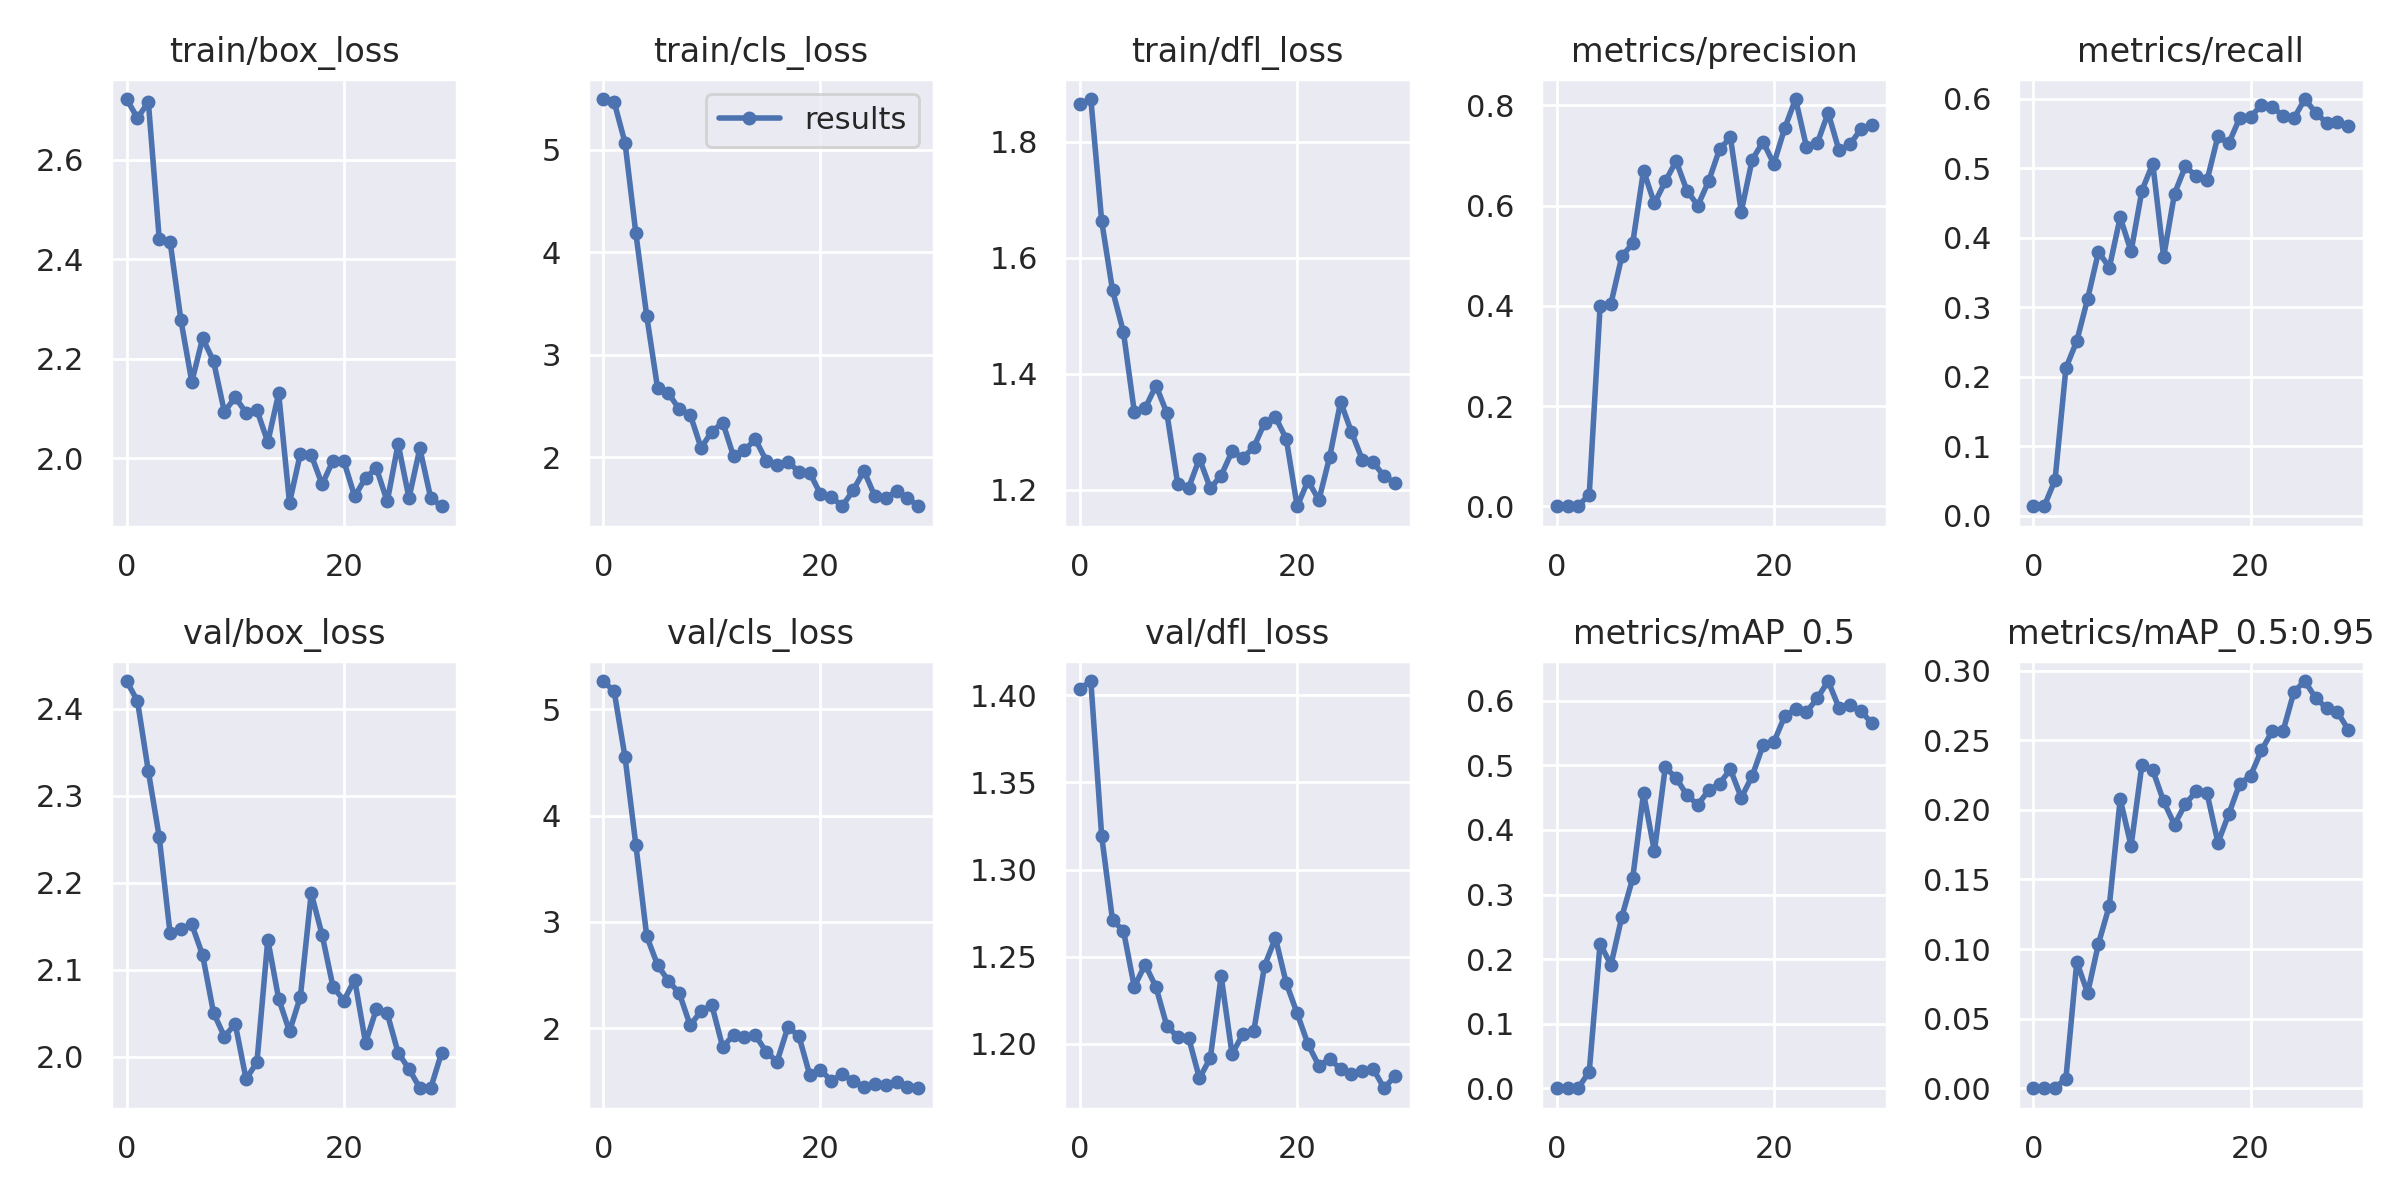

In [41]:
from IPython.display import Image

Image(filename=f"/content/yolov9/runs/train/exp5/results.png", width=1000)

In [12]:
from google.colab import drive
drive.mount('/content/drive')

MessageError: Error: credential propagation was unsuccessful

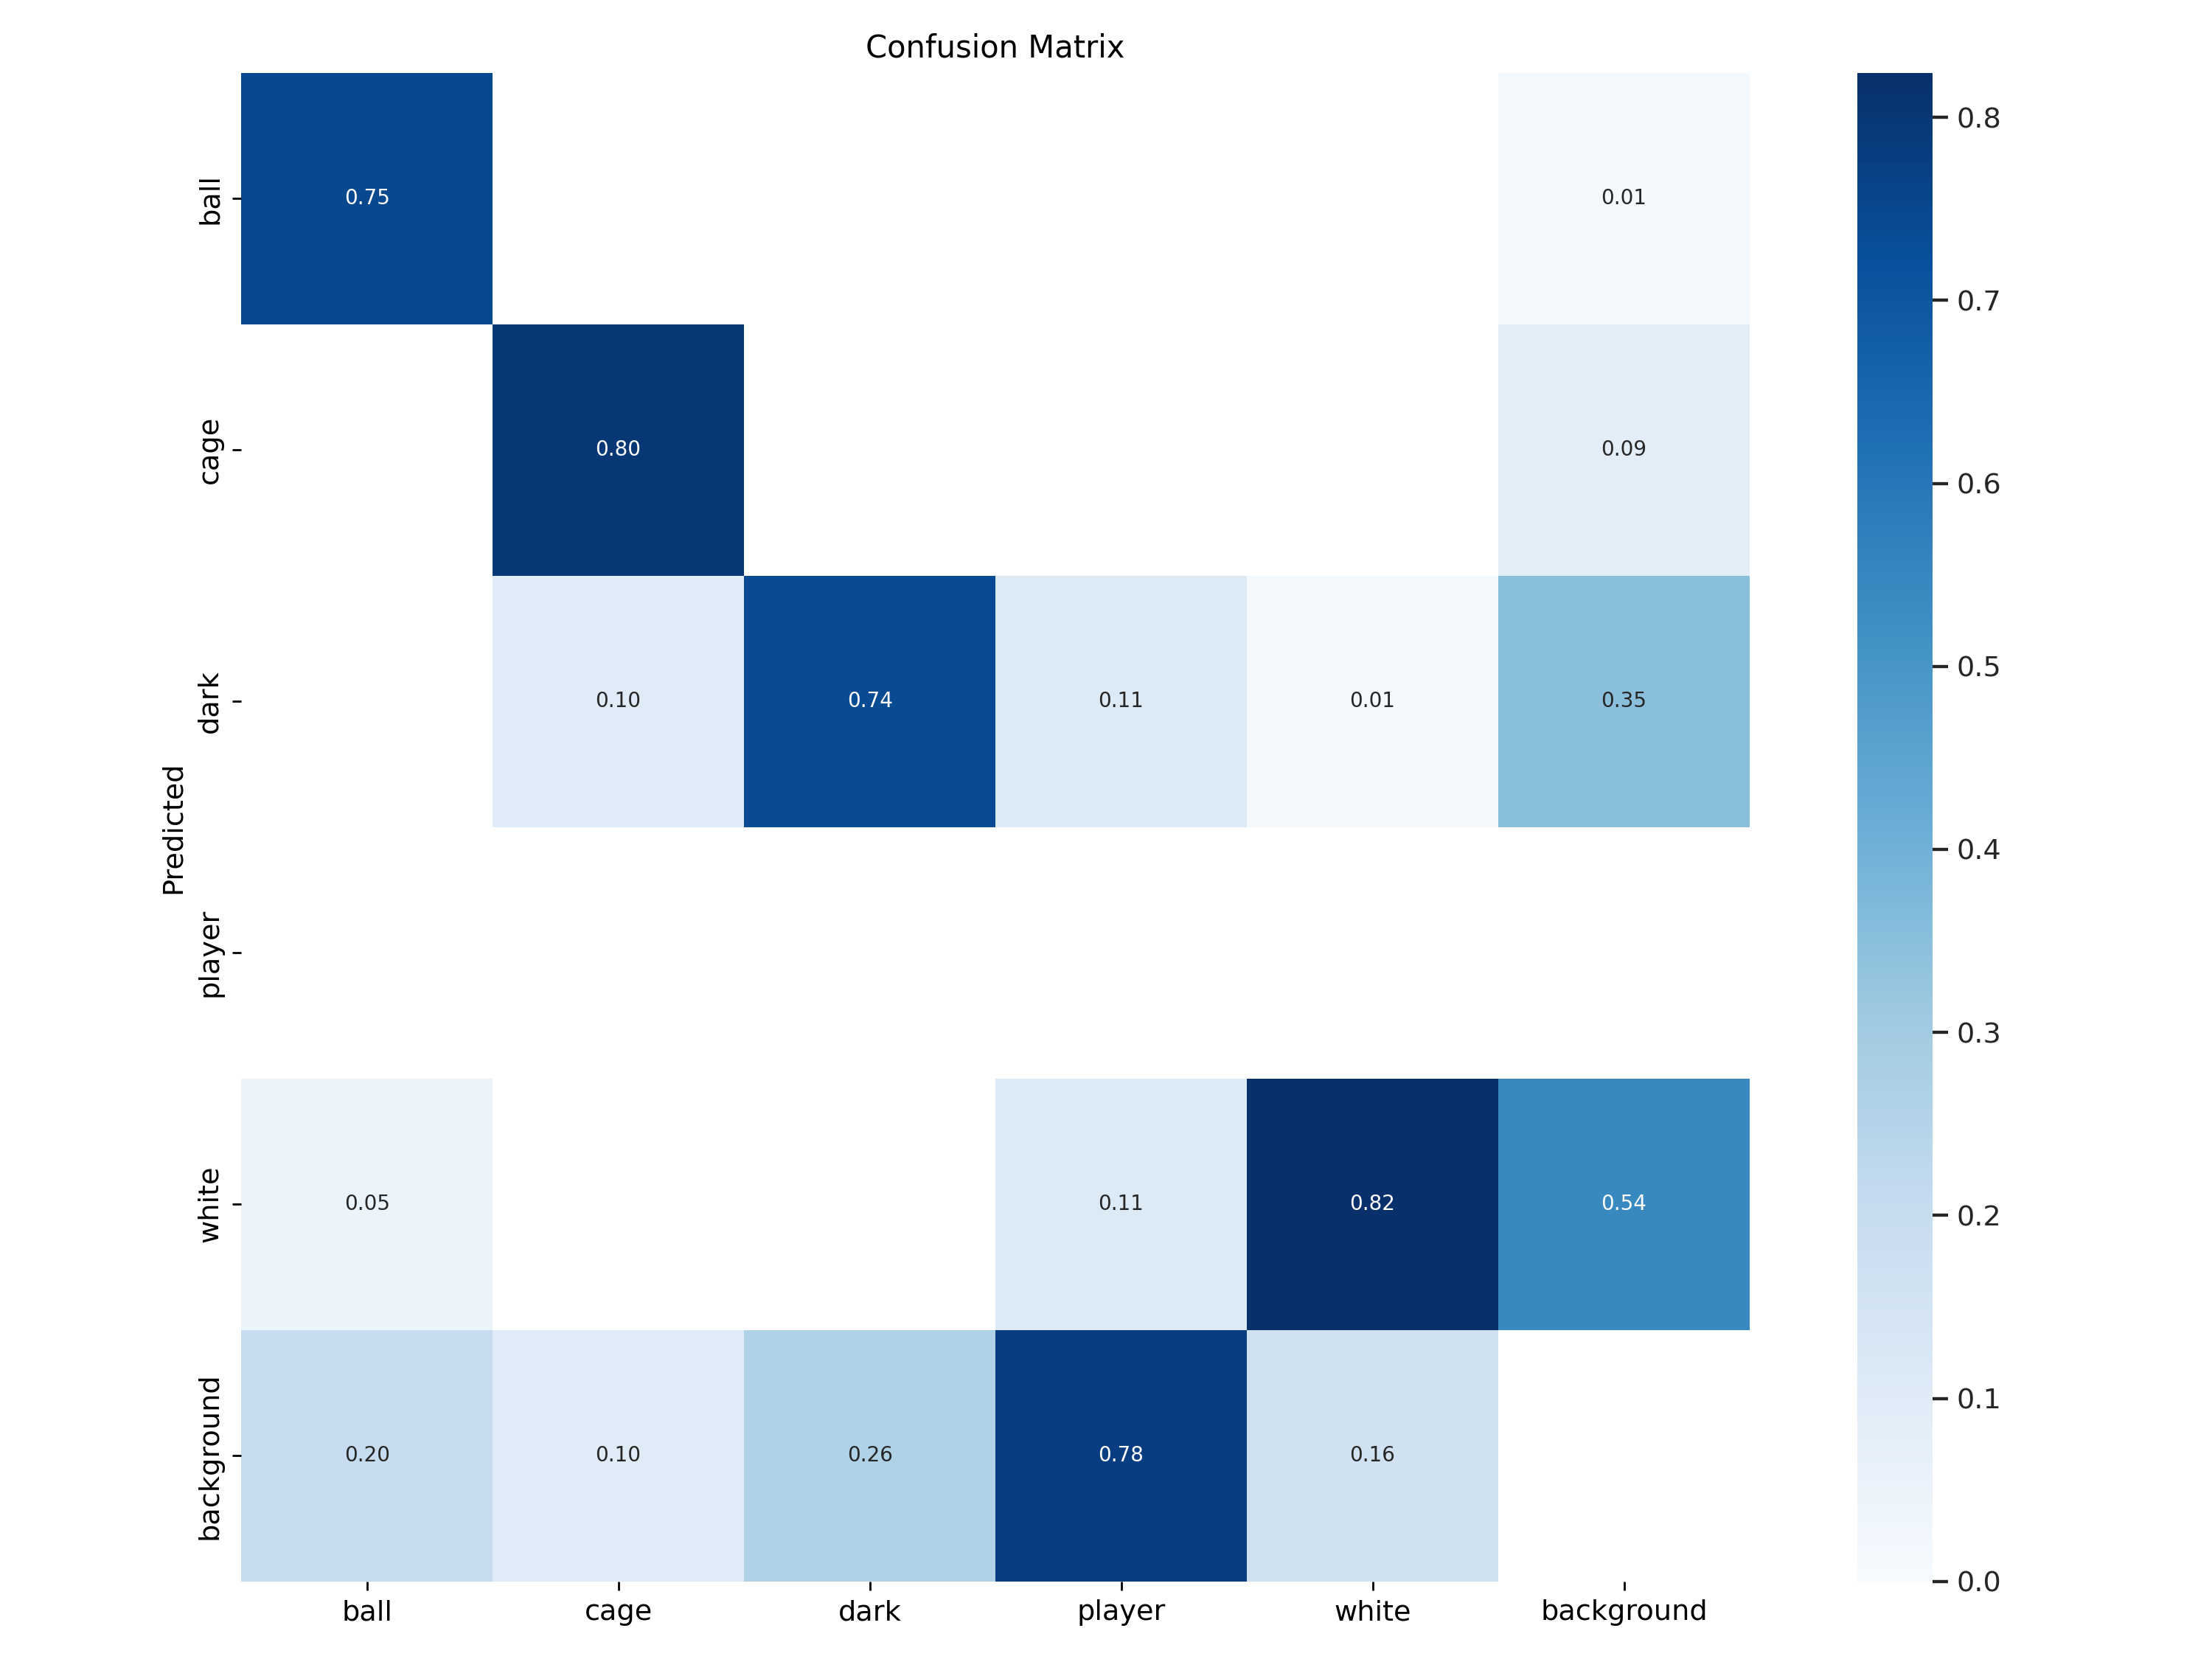

In [42]:
from IPython.display import Image

Image('/content/yolov9/runs/train/exp5/confusion_matrix.png', width=1000)

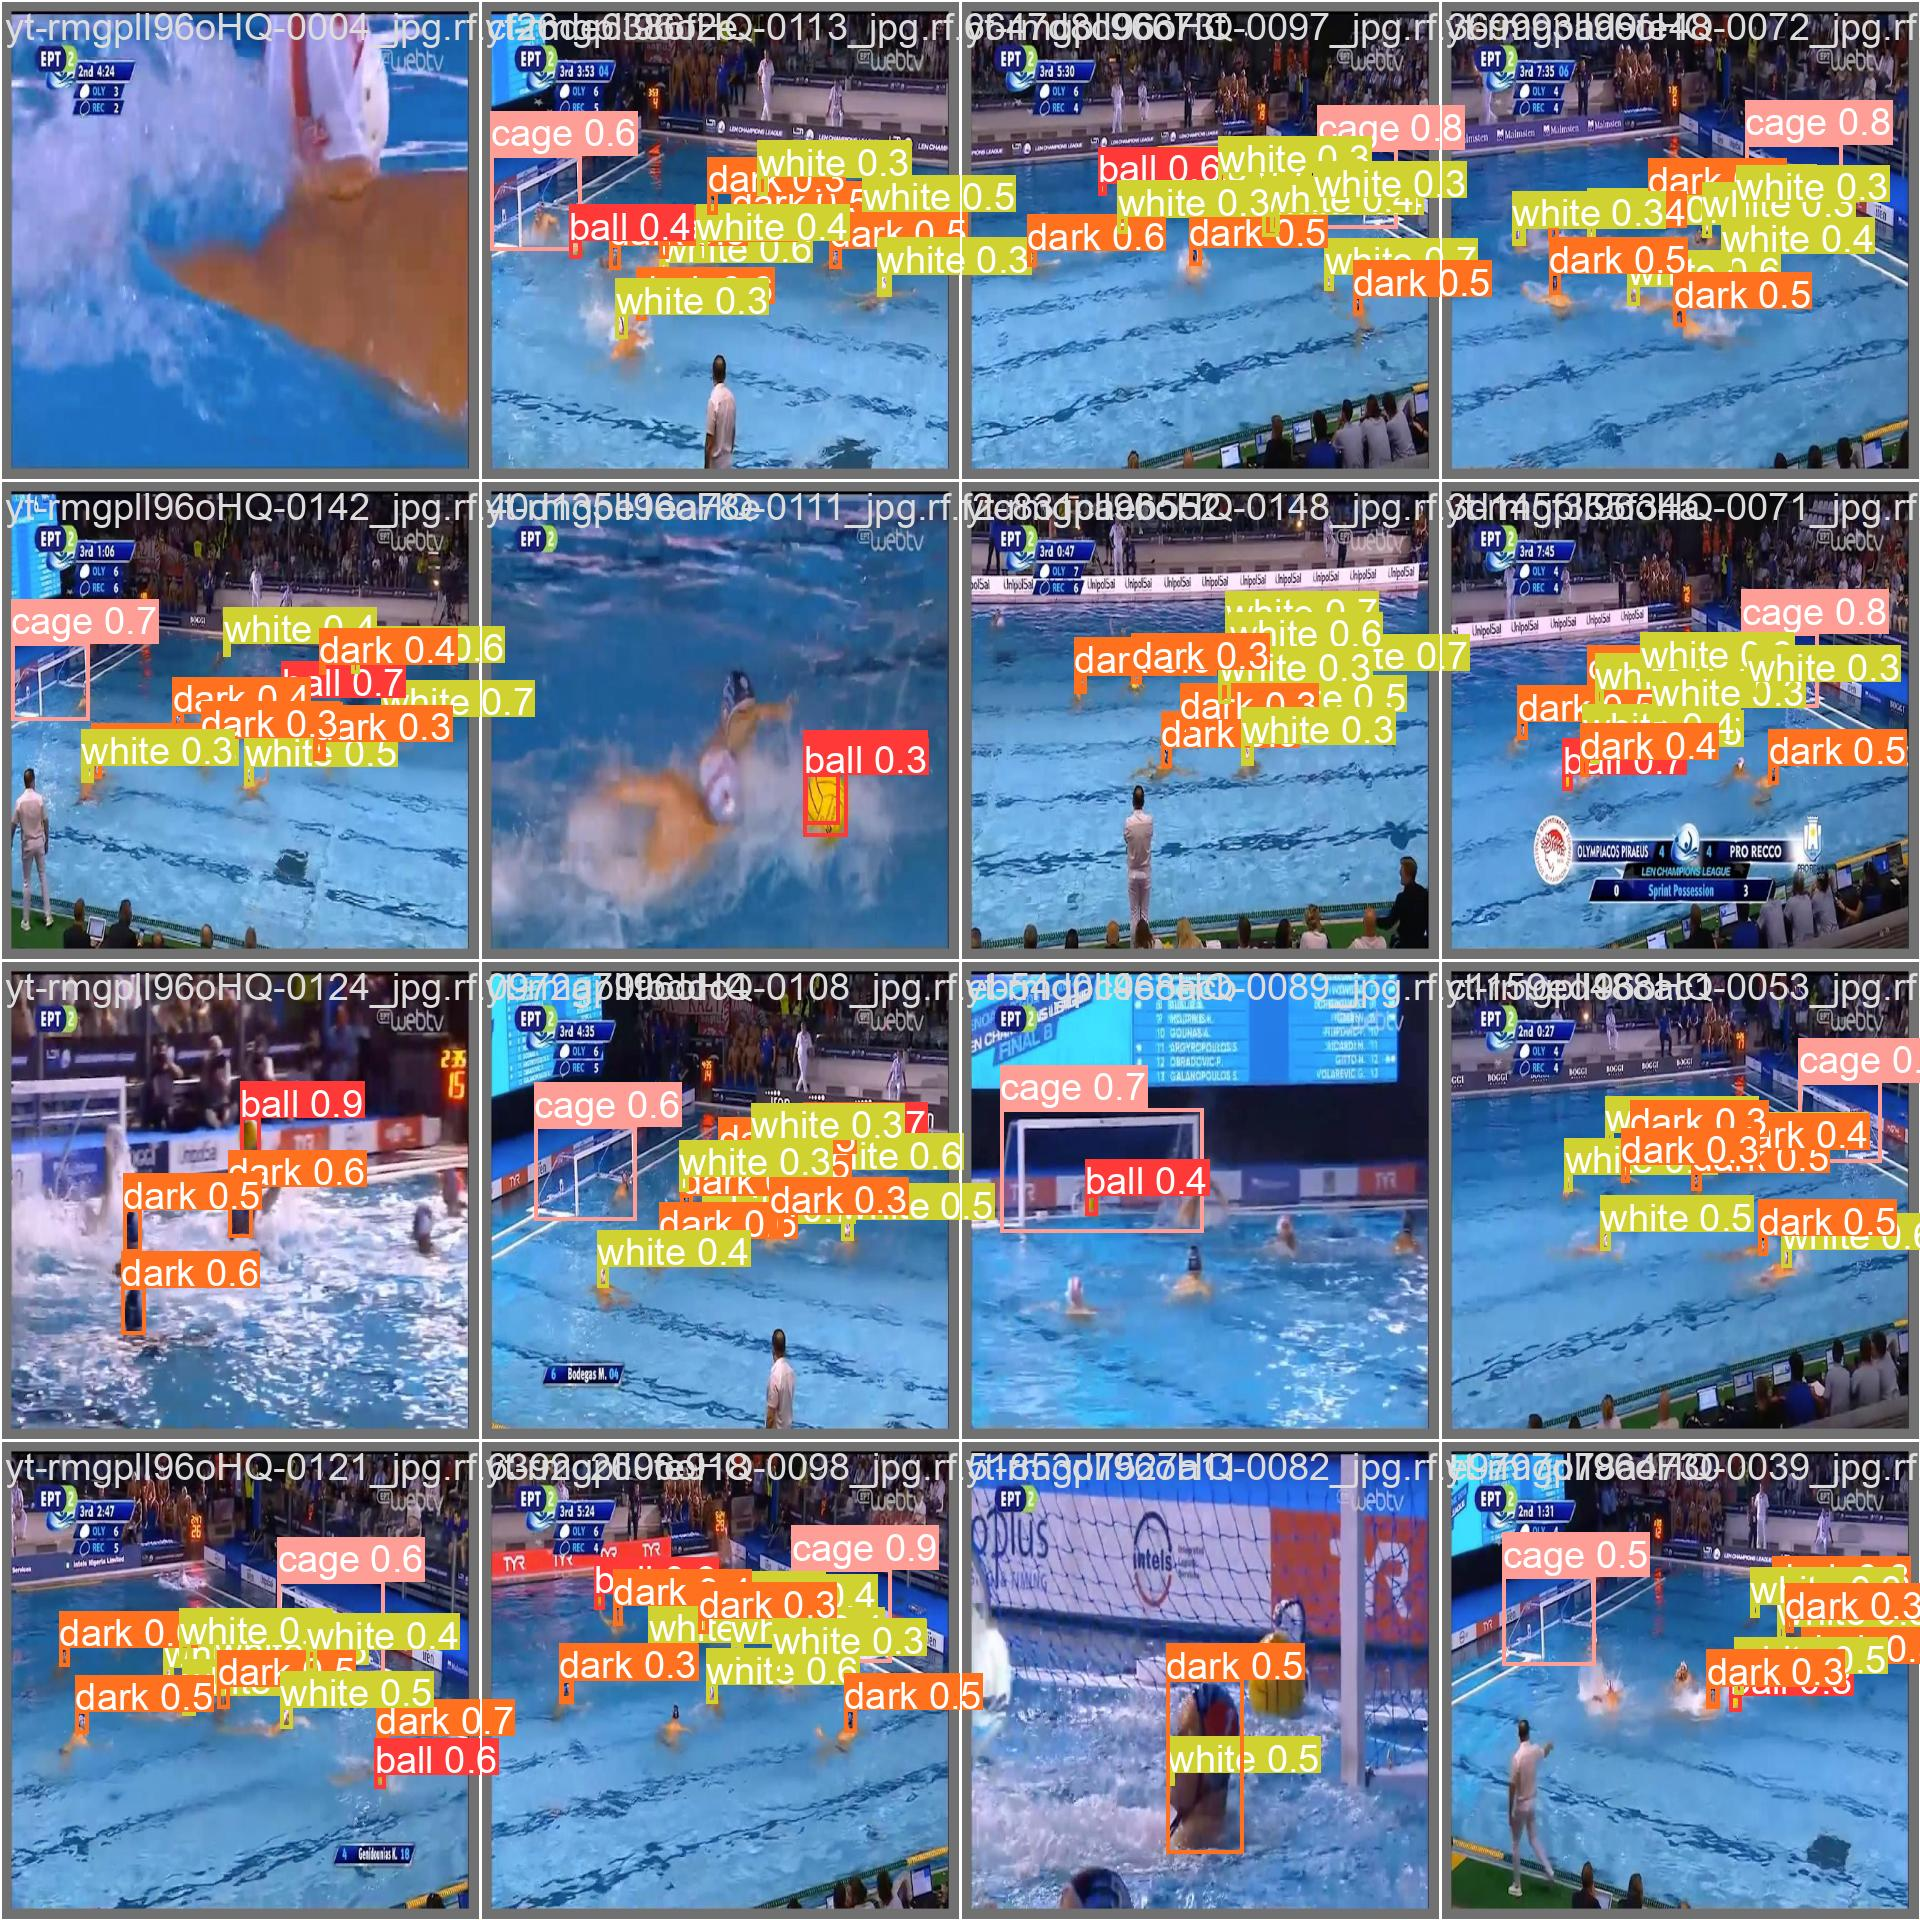

In [43]:
from IPython.display import Image

Image('/content/yolov9/runs/train/exp5/val_batch0_pred.jpg', width=1000)

## Validate Custom Model

In [45]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 32 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/yolov9/runs/train/exp5/weights/best.pt

/content/yolov9
val: data=/content/yolov9/polo_d-3/data.yaml, weights=['/content/yolov9/runs/train/exp5/weights/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
val: Scanning /content/yolov9/polo_d-3/valid/labels.cache... 21 images, 0 backgrounds, 0 corrupt: 100% 21/21 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 1/1 [00:02<00:00,  2.12s/it]
                   all         21        178      0.778      0.596      0.626      0.294
                  ball         21         20      0.961       0.75

## Inference with Custom Model

In [18]:
!python detect.py \
--img 1280 --conf 0.1 --device 0 \
--weights {HOME}/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/test/images \
--save-txt

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/polo_d-2/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=True, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25414815 parameters, 0 gradients, 102.5 GFLOPs
image 1/13 /content/yolov9/polo_d-2/test/images/youtube-105_jpg.rf.a594bbf6d6bb22b95f4b35cd42021a39.jpg: 1280x1280 2 balls, 126.5ms
image 2/13 /content/yolov9/polo_d-2/test/images/youtube-77_jpg.rf.bcb343e4290dc3043771e8930ef32214.jpg: 1280x1280 1 ball, 102.2ms
image 3/13 /content/yolov9/polo_d-2/test/images/youtube-

**NOTE:** Just like behore, the inference results have been saved in the appropriate directory inside `{HOME}/yolov9/runs/detect/`. Let's examine few of those results.

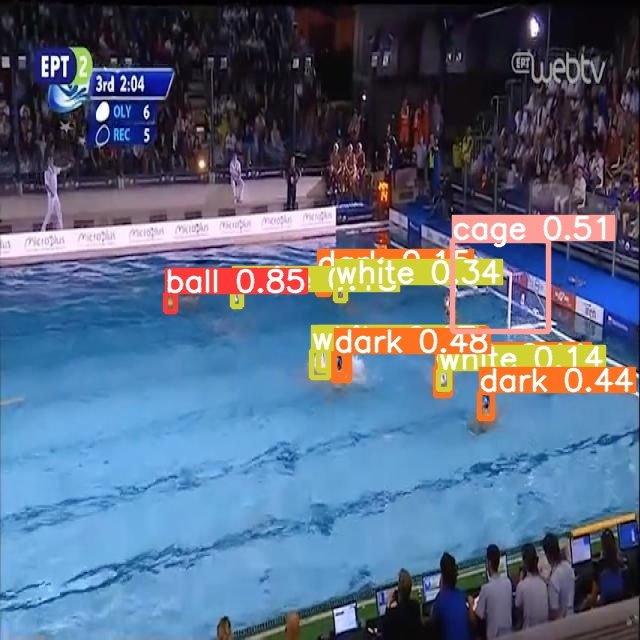

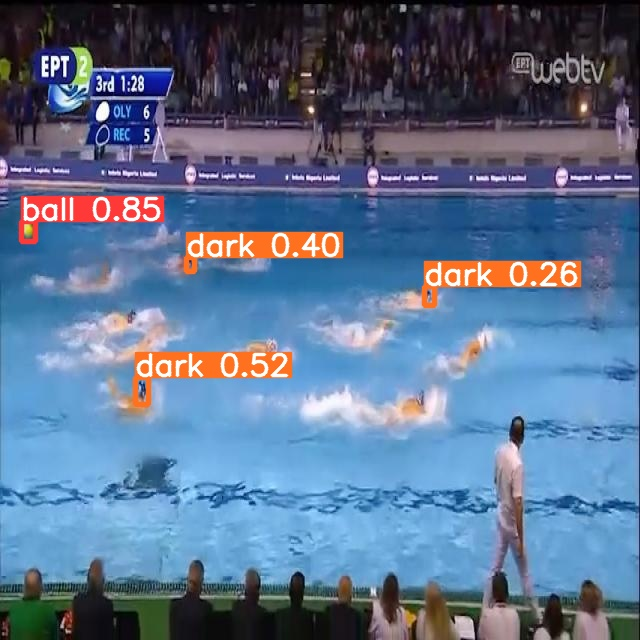

In [46]:
import glob

from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/yolov9/runs/detect/exp2/*.jpg')[:2]:
      display(Image(filename=image_path, width=600))

## BONUS: Deploy YOLOv9 Model with Inference

**NOTE:** To deploy the model and display inference results, we will need two additional packages - [`inference`](https://pypi.org/project/inference) and [`supervision`](https://pypi.org/project/supervision). Let's install and import them!

In [20]:
!pip install -q inference supervision

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 414.0/414.0 kB 5.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 124.0/124.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.2/59.2 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.8/91.8 kB 11.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 252.0/252.0 kB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 239.7/239.7 kB 20.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 31.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.0/66.0 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 327.4/327.4 kB 35.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 940.0/940.0 kB 31.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━

In [21]:
import cv2
import random
import getpass

import supervision as sv

from inference import get_model

%matplotlib inline

**NOTE:** Before using your model in Inference, you first need to upload your weights to Roboflow Universe. Ensure to specify the correct `model_type` - `yolov9`, and that the project version matches the version of the dataset you used for training, denoted by `[1]`. In my case, it's `6`.

![YOLOv9 Benchmark](https://storage.googleapis.com/com-roboflow-marketing/notebooks/examples/upload-roboflow-model.png)



In [48]:
version.deploy(model_type="yolov9", model_path=f"{HOME}/yolov9/runs/train/exp5")

View the status of your deployment at: https://app.roboflow.com/polo-jveue/polo_d/4
Share your model with the world at: https://universe.roboflow.com/polo-jveue/polo_d/model/4


**NOTE:** Now we can download our model anywhere using the assigned `model_id` denoted by `[2]`. In my case `football-players-detection-3zvbc/6`. To download the model you will need your [`ROBOFLOW_API_KEY`](https://docs.roboflow.com/api-reference/authentication).




In [49]:
# ROBOFLOW_API_KEY = getpass.getpass()

from roboflow import Roboflow

rf = Roboflow(api_key="VOStXUAfypKHvifaC6gD")
project = rf.workspace("polo-jveue").project("polo_d")
model = project.version(4).model
# model = get_model(model_id="https://app.roboflow.com/polo_d/2", api_key=ROBOFLOW_API_KEY)

loading Roboflow workspace...
loading Roboflow project...


**NOTE:** Let's pick random image from our test subset and detect objects using newly fine-tuned model.

In [90]:
image_paths = sv.list_files_with_extensions(
    directory=f"{dataset.location}/test/images",
    extensions=['png', 'jpg', 'jpeg']
)
image_path = random.choice(image_paths)
image = cv2.imread(str(image_path))



result = model.predict(image, confidence=15, overlap = 0).json()
# model.predict(image, confidence = 20, overlap = 80)
detections = sv.Detections.from_inference(result)

**NOTE:** Finally, let's use supervision and [annotate](https://supervision.roboflow.com/develop/annotators/) our results.

array([[[ 14,   8,   8],
        [ 11,   7,   6],
        [  8,   3,   7],
        ...,
        [  7,   2,   6],
        [  6,   1,   5],
        [  6,   1,   5]],

       [[ 13,   7,   7],
        [ 11,   5,   5],
        [  7,   3,   4],
        ...,
        [  8,   3,   7],
        [  7,   2,   6],
        [  6,   1,   5]],

       [[ 13,   4,   5],
        [  9,   3,   3],
        [  6,   2,   3],
        ...,
        [  8,   3,   7],
        [  8,   3,   7],
        [  8,   3,   7]],

       ...,

       [[113, 101,  87],
        [116, 104,  90],
        [118, 104,  93],
        ...,
        [108, 152, 189],
        [111, 151, 187],
        [ 13,  51,  88]],

       [[122, 110,  96],
        [125, 113,  99],
        [129, 115, 104],
        ...,
        [109, 153, 190],
        [110, 153, 188],
        [ 13,  53,  89]],

       [[118, 106,  92],
        [121, 109,  95],
        [124, 110,  99],
        ...,
        [109, 153, 190],
        [111, 154, 189],
        [ 14,  54,  90]]], dtype=uint8)
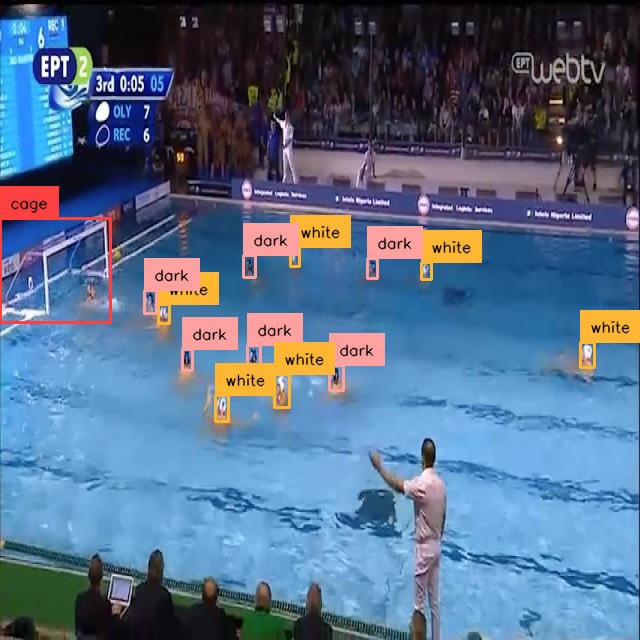

In [91]:
label_annotator = sv.LabelAnnotator(text_color=sv.Color.BLACK)
bounding_box_annotator = sv.BoundingBoxAnnotator()

annotated_image = image.copy()
annotated_image = bounding_box_annotator.annotate(scene=annotated_image, detections=detections)
annotated_image = label_annotator.annotate(scene=annotated_image, detections=detections)

sv.plot_image(annotated_image)
annotated_image[:,:,::-1]